In [1]:
import numpy as np
import pandas as pd
import pennylane as q
import scipy.stats as s
import copy
import datetime

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500


from QuantumOperations import ClassicalOperations, QuantumGates, QuantumAlgorithms

In [2]:
c = ClassicalOperations()
qg = QuantumGates()
qa = QuantumAlgorithms()

## controlled_Two_level_U

In [3]:
# rows of U with non-trivial entries
non_trivial_indices = np.array([4,2])

In [4]:
U = s.unitary_group.rvs(2)
# U = np.array([[0,1],
#               [1,0]])
# get V from V^4 = U
V = np.eye(2**3,dtype='complex128')
for i in range(2):
    for j in range(2):
        V[non_trivial_indices[i]][non_trivial_indices[j]] = U[i][j]

print('Matrix U')
print(U)
print('\033[1m'+'probabilities for U|0>:'+str(np.absolute(U.dot(np.array([1,0])))**2)+'\033[0m')
print('\033[1m'+'probabilities for U|1>:'+str(np.absolute(U.dot(np.array([0,1])))**2)+'\033[0m')

print('Matrix V')
print(V)

Matrix U
[[-0.10938069-0.07325134j  0.50076354-0.85551504j]
 [-0.86688668+0.48080931j  0.07069765+0.11104836j]]
probabilities for U|0>:[0.0173299 0.9826701]
probabilities for U|1>:[0.9826701 0.0173299]
Matrix V
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.07069765+0.11104836j
   0.        +0.j         -0.86688668+0.48080931j  0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j        

In [5]:
# wires
wires=['q0','q1','q2','q3']
# device
dev = q.device('default.qubit', wires=wires, shots=1e6, analytic=False)

# circuit
def func(V,non_trivial_indices,input_):
    
    # preparation
    if (int(input_[0].val) == 1):
        q.PauliX(wires=wires[0])
    if (int(input_[1].val) == 1):
        q.PauliX(wires=wires[1])
    if (int(input_[2].val) == 1):
        q.PauliX(wires=wires[2])
    if (int(input_[3].val) == 1):
        q.PauliX(wires=wires[3])
    
    qg.controlled_Two_level_U(V,non_trivial_indices,wires[0],wires[1:])
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [6]:
# Check input 
states = c.states_vector(wires)
measurements = circuit(V,non_trivial_indices,np.array([1,0,0,1]))
np.vstack([states,measurements]).T

array([['|0000>', '0.0'],
       ['|0001>', '0.0'],
       ['|0010>', '0.0'],
       ['|0011>', '0.0'],
       ['|0100>', '0.0'],
       ['|0101>', '0.0'],
       ['|0110>', '0.0'],
       ['|0111>', '0.0'],
       ['|1000>', '0.0'],
       ['|1001>', '1.0'],
       ['|1010>', '0.0'],
       ['|1011>', '0.0'],
       ['|1100>', '0.0'],
       ['|1101>', '0.0'],
       ['|1110>', '0.0'],
       ['|1111>', '0.0']], dtype='<U32')

In [7]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(V,non_trivial_indices,input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:06.671196


In [8]:
df

,states,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
0,|0000>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,|0001>,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,|0010>,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,|0011>,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,|0100>,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
5,|0101>,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
6,|0110>,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
7,|0111>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
8,|1000>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
9,|1001>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0


# C_U_n

In [9]:
U = s.unitary_group.rvs(8)

print('Matrix U')
print(U)
print('\033[1m'+'probabilities for U|000>:'+str(np.absolute(U.dot(np.array([1,0,0,0,0,0,0,0])))**2)+'\033[0m')
print('\033[1m'+'probabilities for U|111>:'+str(np.absolute(U.dot(np.array([0,0,0,0,0,0,0,1])))**2)+'\033[0m')

Matrix U
[[-0.11166434+0.37764194j -0.01194943-0.10731892j -0.43478774-0.42634741j
  -0.29106348-0.34540987j  0.16685457-0.04812169j -0.00273568+0.05750219j
   0.12246088-0.11873588j -0.1305096 +0.4228727j ]
 [ 0.34091118-0.24654329j -0.09339188+0.3038883j  -0.34293467-0.20772107j
  -0.08073628+0.02518572j -0.42671682+0.30089033j -0.08640041-0.07334877j
   0.28576003+0.3800091j  -0.20243193-0.03884878j]
 [ 0.2832414 -0.00712708j  0.7185315 -0.0386712j   0.07658412+0.00340581j
  -0.19765712+0.07991773j -0.0975672 -0.10376583j -0.09010845-0.25590605j
  -0.28932829-0.10519569j -0.39036657+0.0977314j ]
 [-0.45390057-0.07663973j -0.00074755-0.14290606j -0.3845618 +0.39923048j
  -0.00491668-0.28567738j -0.36218972-0.30052817j -0.16296555-0.00112659j
  -0.09048095+0.06730102j -0.24556193-0.24019768j]
 [-0.50114089+0.06504953j  0.15214106+0.38337958j  0.05480776-0.25918958j
  -0.14447243+0.38213649j -0.24071975-0.08164631j -0.36384315-0.0520723j
  -0.08655312+0.03111312j  0.3291129 +0.14469141

In [12]:
# wires
wires=['q0','q1','q2','q3']
# device
dev = q.device('default.qubit', wires=wires, shots=1e6, analytic=False)

# circuit
def func(V,input_):
    
    # preparation
    if (int(input_[0].val) == 1):
        q.PauliX(wires=wires[0])
    if (int(input_[1].val) == 1):
        q.PauliX(wires=wires[1])
    if (int(input_[2].val) == 1):
        q.PauliX(wires=wires[2])
    if (int(input_[3].val) == 1):
        q.PauliX(wires=wires[3])
    
    qa.C_U_n(V,wires[0],wires[1:])
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [13]:
# Check input
states = c.states_vector(wires)
measurements = circuit(U,np.array([1,0,0,0]))
np.vstack([states,measurements]).T

array([['|0000>', '0.0'],
       ['|0001>', '0.0'],
       ['|0010>', '0.0'],
       ['|0011>', '0.0'],
       ['|0100>', '0.0'],
       ['|0101>', '0.0'],
       ['|0110>', '0.0'],
       ['|0111>', '0.0'],
       ['|1000>', '0.154574'],
       ['|1001>', '0.177855'],
       ['|1010>', '0.080148'],
       ['|1011>', '0.211554'],
       ['|1100>', '0.255368'],
       ['|1101>', '0.020076'],
       ['|1110>', '0.041329'],
       ['|1111>', '0.059096']], dtype='<U32')

In [14]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(U,input_np_array)
    
    df[input_str] = measurements
df

end = datetime.datetime.now()
print(end-start)

0:03:32.875427


In [15]:
df

,states,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
0,|0000>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,|0001>,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,|0010>,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,|0011>,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,|0100>,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,|0101>,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,|0110>,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,|0111>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,|1000>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155422,0.011631,0.370943,0.203777,0.030027,0.003417,0.029195,0.195136
9,|1001>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177420,0.101262,0.160447,0.007023,0.273041,0.012790,0.225788,0.042528


## CR_k

In [16]:
k=3

In [17]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires=[0,1]
# device
dev = q.device('default.qubit', wires=wires)
# to enable experimental mode in which it is possible to return quantum states of qubits
q.enable_tape()

# circuit
def func(k,input_):
    
    # preparation
    if (input_[0] == 1):
        q.PauliX(wires=wires[0])
    if (input_[1] == 1):
        q.PauliX(wires=wires[1])
    
    qg.CR_k(k,wires[0],wires[1])
    
    return q.state()

# QNode
circuit = q.QNode(func,dev)

In [18]:
# Check input
states = c.states_vector(wires)
measurements = circuit(k,np.array([1,0]))
np.vstack([states,measurements]).T

array([['|00>', '0j'],
       ['|01>', '0j'],
       ['|10>', '(1+5.551115123125783e-17j)'],
       ['|11>', '0j']], dtype='<U64')

In [19]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(k,input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.007901


In [20]:
df

,states,00,01,10,11
0,|00>,(1+0j),0j,0j,0j
1,|01>,0j,(1+0j),0j,0j
2,|10>,0j,0j,(1+5.551115123125783e-17j),0j
3,|11>,0j,0j,0j,(0.7071067811865475+0.7071067811865475j)


In [21]:
q.disable_tape()

## QFT

In [22]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires=[0,1]
# device
dev = q.device('default.qubit', wires=wires)
# to enable experimental mode in which it is possible to return quantum states of qubits
q.enable_tape()

# circuit
def func(input_):
    
    # preparation
    if (input_[0] == 1):
        q.PauliX(wires=wires[0])
    if (input_[1] == 1):
        q.PauliX(wires=wires[1])
    
    qa.QFT(wires=wires)
    
    return q.state()

# QNode
circuit = q.QNode(func,dev)

In [23]:
# Check input
states = c.states_vector(wires)
measurements = circuit(np.array([0,0]))
np.vstack([states,measurements]).T

array([['|00>', '(0.49999999999999983+1.9626155733547187e-17j)'],
       ['|01>', '(0.49999999999999983-1.9626155733547187e-17j)'],
       ['|10>', '(0.49999999999999983+1.9626155733547187e-17j)'],
       ['|11>', '(0.49999999999999983-1.9626155733547187e-17j)']],
      dtype='<U64')

In [24]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.011328


In [25]:
# expected output:
# [[0.5+0.0j,  0.5+0.0j,  0.5+0.0j,  0.5+0.0j],
#  [0.5+0.0j,  0.0+0.5j, -0.5+0.0j,  0.0-0.5j],
#  [0.5+0.0j, -0.5+0.0j,  0.5+0.0j, -0.5+0.0j],
#  [0.5+0.0j,  0.0-0.5j, -0.5+0.0j,  0.0+0.5j]]
df

,states,00,01,10,11
0,|00>,(0.49999999999999983+1.9626155733547187e-17j),(0.4999999999999999+0j),(0.49999999999999983+1.9626155733547187e-17j),(0.4999999999999999+0j)
1,|01>,(0.49999999999999983-1.9626155733547187e-17j),0.4999999999999999j,(-0.49999999999999983+1.9626155733547187e-17j),-0.4999999999999999j
2,|10>,(0.49999999999999983+1.9626155733547187e-17j),(-0.4999999999999999+0j),(0.49999999999999983+1.9626155733547187e-17j),(-0.4999999999999999+0j)
3,|11>,(0.49999999999999983-1.9626155733547187e-17j),-0.4999999999999999j,(-0.49999999999999983+1.9626155733547187e-17j),0.4999999999999999j


In [26]:
q.disable_tape()

# Phase_Estimation

#### Setting 1
First register contains 1 qubit\
Second register contains 1 qubit
$$U = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
The first register is prepared in a state$|0\rangle$\
The second register is prepared in one of two eigenstates of U:
$$|u_1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}\text{ , }|u_2\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix},$$

In [27]:
t = 1

In [28]:
# wires
wires=['q0','q1']
# device
dev = q.device('default.qubit', wires=wires, shots=1e6, analytic=False)

# circuit
def func(U,eigenstate):
    
    # preparation
    if eigenstate.val == 1:
        q.Hadamard(wires=wires[1])
    if eigenstate.val == 2:
        q.PauliX(wires=wires[1])
        q.Hadamard(wires=wires[1])
    
    # phase estimation
    qa.Phase_Estimation(U,t=t,wires=wires)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [29]:
U = np.array([[0,1],
              [1,0]],dtype='complex128')

In [30]:
# Check
states = c.states_vector(wires)
measurements = circuit(U,2)
np.vstack([states,measurements]).T

array([['|00>', '0.0'],
       ['|01>', '0.0'],
       ['|10>', '0.500171'],
       ['|11>', '0.499829']], dtype='<U32')

In [31]:
start = datetime.datetime.now()

# check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(1,len(wires)+1):
    
    measurements = circuit(U,i)
    
    df['u_'+str(i)] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.197551


In [32]:
df

,states,u_1,u_2
0,|00>,0.500746,0.000000
1,|01>,0.499254,0.000000
2,|10>,0.000000,0.499667
3,|11>,0.000000,0.500333


#### Setting 2
First register contains 2 qubits\
Second register contains 2 qubits
$$U = \begin{bmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ \end{bmatrix}$$
The first register is prepared in a state$|00\rangle$\
The second register is prepared in one of four eigenstates of U:
$$|u_1\rangle = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}\text{ , }|u_2\rangle = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \end{bmatrix}\text{ , }|u_3\rangle = \frac{1}{2}\begin{bmatrix} 1 \\ -1 \\ 1 \\ -1 \end{bmatrix}\text{ , }|u_4\rangle = \frac{1}{2}\begin{bmatrix} 1 \\ -1 \\ -1 \\ 1 \end{bmatrix}\text{ , }$$
Actual measurements are performed for $|u_1\rangle$ and $|u_3\rangle$

In [33]:
t = 2

In [34]:
# wires
wires=['q0','q1','q2','q3']
# device
dev = q.device('default.qubit', wires=wires, shots=1e6, analytic=False)

# circuit
def func(U,eigenstate):
    
    # preparation
    if eigenstate.val == 1:
        q.Hadamard(wires=wires[2])
        q.Hadamard(wires=wires[3])
    if eigenstate.val == 3:
        q.PauliX(wires=wires[2])
        q.Hadamard(wires=wires[2])
        q.PauliX(wires=wires[3])
        q.Hadamard(wires=wires[3])
    
    # phase estimation
    qa.Phase_Estimation(U,t=t,wires=wires)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [35]:
U = np.array([[0,1,0,0],
              [1,0,0,0],
              [0,0,0,1],
              [0,0,1,0]],dtype='complex128')

In [36]:
# Check input
states = c.states_vector(wires)
measurements = circuit(U,1)
np.vstack([states,measurements]).T

array([['|0000>', '0.250106'],
       ['|0001>', '0.250184'],
       ['|0010>', '0.249972'],
       ['|0011>', '0.249738'],
       ['|0100>', '0.0'],
       ['|0101>', '0.0'],
       ['|0110>', '0.0'],
       ['|0111>', '0.0'],
       ['|1000>', '0.0'],
       ['|1001>', '0.0'],
       ['|1010>', '0.0'],
       ['|1011>', '0.0'],
       ['|1100>', '0.0'],
       ['|1101>', '0.0'],
       ['|1110>', '0.0'],
       ['|1111>', '0.0']], dtype='<U32')

In [37]:
start = datetime.datetime.now()

# check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])

measurements = circuit(U,1)
df['u_1'] = measurements
measurements = circuit(U,3)
df['u_3'] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.546572


In [38]:
df

,states,u_1,u_3
0,|0000>,0.249800,0.000000
1,|0001>,0.250359,0.000000
2,|0010>,0.250330,0.000000
3,|0011>,0.249511,0.000000
4,|0100>,0.000000,0.000000
5,|0101>,0.000000,0.000000
6,|0110>,0.000000,0.000000
7,|0111>,0.000000,0.000000
8,|1000>,0.000000,0.250625
9,|1001>,0.000000,0.249629


## Toffoli

In [39]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires=[0,1,2]
# device
dev = q.device('default.qubit', wires=wires)
# to enable experimental mode in which it is possible to return quantum states of qubits
q.enable_tape()

# circuit
def func(input_):
    
    # preparation
    if (input_[0] == 1):
        q.PauliX(wires=wires[0])
    if (input_[1] == 1):
        q.PauliX(wires=wires[1])
    if (input_[2] == 1):
        q.PauliX(wires=wires[2])
    
    qg.Toffoli(wires)
    
    return q.state()

# QNode
circuit = q.QNode(func,dev)

In [40]:
# Check input
states = c.states_vector(wires)
measurements = circuit(np.array([0,0,0]))
np.vstack([states,measurements]).T

array([['|000>', '(1+0j)'],
       ['|001>', '(-1.570092458683775e-16+0j)'],
       ['|010>', '0j'],
       ['|011>', '0j'],
       ['|100>', '0j'],
       ['|101>', '0j'],
       ['|110>', '0j'],
       ['|111>', '0j']], dtype='<U64')

In [41]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.028407


In [42]:
df

,states,000,001,010,011,100,101,110,111
0,|000>,(1+0j),(-1.570092458683775e-16+0j),0j,0j,0j,0j,0j,0j
1,|001>,(-1.570092458683775e-16+0j),(1+0j),0j,0j,0j,0j,0j,0j
2,|010>,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j
3,|011>,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j
4,|100>,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j
5,|101>,0j,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j
6,|110>,0j,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j)
7,|111>,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j),0j


In [43]:
q.disable_tape()

## CARRY

In [44]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires=[0,1,2,3]
# device
dev = q.device('default.qubit', wires=wires)
# to enable experimental mode in which it is possible to return quantum states of qubits
q.enable_tape()

# circuit
def func(input_):
    
    # preparation
    if (input_[0] == 1):
        q.PauliX(wires=wires[0])
    if (input_[1] == 1):
        q.PauliX(wires=wires[1])
    if (input_[2] == 1):
        q.PauliX(wires=wires[2])
    if (input_[3] == 1):
        q.PauliX(wires=wires[3])
    
    qg.CARRY(wires)
    
    return q.state()

# QNode
circuit = q.QNode(func,dev)

In [45]:
# Check input
states = c.states_vector(wires)
measurements = circuit(np.array([0,0,0,0]))
np.vstack([states,measurements]).T

array([['|0000>', '(0.9999999999999998+0j)'],
       ['|0001>', '(-2.3551386880256624e-16+0j)'],
       ['|0010>', '0j'],
       ['|0011>', '0j'],
       ['|0100>', '0j'],
       ['|0101>', '0j'],
       ['|0110>', '0j'],
       ['|0111>', '0j'],
       ['|1000>', '0j'],
       ['|1001>', '0j'],
       ['|1010>', '0j'],
       ['|1011>', '0j'],
       ['|1100>', '0j'],
       ['|1101>', '0j'],
       ['|1110>', '0j'],
       ['|1111>', '0j']], dtype='<U64')

In [46]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**len(wires)):
    input_str = '0'*(len(wires)-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.065794


In [47]:
df

,states,0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
0,|0000>,(0.9999999999999998+0j),(-2.3551386880256624e-16+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
1,|0001>,(-2.3551386880256624e-16+0j),(0.9999999999999998+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
2,|0010>,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
3,|0011>,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
4,|0100>,0j,0j,0j,0j,0j,0j,(-7.850462293418875e-17+0j),(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j
5,|0101>,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j),(-7.850462293418875e-17+0j),0j,0j,0j,0j,0j,0j,0j,0j
6,|0110>,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
7,|0111>,0j,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
8,|1000>,0j,0j,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j),(-1.5700924586837752e-16+0j),0j,0j,0j,0j,0j,0j
9,|1001>,0j,0j,0j,0j,0j,0j,0j,0j,(-1.5700924586837752e-16+0j),(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j


In [48]:
q.disable_tape()

## ADDER

In [49]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires = [0,1,2,3,4,5,6]
wires_a = [0,1]
wires_b = [2,3,4]
wires_c = [5,6]
# device
dev = q.device('default.qubit', wires=wires)
# to enable experimental mode in which it is possible to return quantum states of qubits
q.enable_tape()

# circuit
def func(input_):
    
    # preparation
    # register with a
    if (input_[0] == 1):
        q.PauliX(wires=wires[0])
    if (input_[1] == 1):
        q.PauliX(wires=wires[1])
    # register with b
    if (input_[2] == 1):
        q.PauliX(wires=wires[2])
    if (input_[3] == 1):
        q.PauliX(wires=wires[3])
    if (input_[4] == 1):
        q.PauliX(wires=wires[4])
    # register with c is set to |0>
    
    # circuit
    qa.ADDER(wires_a=wires_a,wires_b=wires_b,wires_c=wires_c)
    # to check 'reverse' functionality: ADDER + ADDER(reverse=True) should be Identity
#     qa.ADDER(wires_a=wires_a,wires_b=wires_b,wires_c=wires_c,reverse=True)
    
    return q.state()

# QNode
circuit = q.QNode(func,dev)

In [50]:
# Check input
states = c.states_vector(wires)
measurements = circuit(np.array([1,0,1,0,1]))
np.vstack([states,measurements]).T

array([['|0000000>', '0j'],
       ['|0000001>', '0j'],
       ['|0000010>', '0j'],
       ['|0000011>', '0j'],
       ['|0000100>', '0j'],
       ['|0000101>', '0j'],
       ['|0000110>', '0j'],
       ['|0000111>', '0j'],
       ['|0001000>', '0j'],
       ['|0001001>', '0j'],
       ['|0001010>', '0j'],
       ['|0001011>', '0j'],
       ['|0001100>', '0j'],
       ['|0001101>', '0j'],
       ['|0001110>', '0j'],
       ['|0001111>', '0j'],
       ['|0010000>', '0j'],
       ['|0010001>', '0j'],
       ['|0010010>', '0j'],
       ['|0010011>', '0j'],
       ['|0010100>', '0j'],
       ['|0010101>', '0j'],
       ['|0010110>', '0j'],
       ['|0010111>', '0j'],
       ['|0011000>', '0j'],
       ['|0011001>', '0j'],
       ['|0011010>', '0j'],
       ['|0011011>', '0j'],
       ['|0011100>', '0j'],
       ['|0011101>', '0j'],
       ['|0011110>', '0j'],
       ['|0011111>', '0j'],
       ['|0100000>', '0j'],
       ['|0100001>', '0j'],
       ['|0100010>', '0j'],
       ['|0100011>',

In [51]:
start = datetime.datetime.now()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**5):
    input_str = '0'*(5-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(input_np_array)
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:00:00.342435


In [52]:
df[df['states'].str.slice(start=-3,stop=-1) == '00']

,states,00000,00001,00010,00011,00100,00101,00110,00111,01000,01001,01010,01011,01100,01101,01110,01111,10000,10001,10010,10011,10100,10101,10110,10111,11000,11001,11010,11011,11100,11101,11110,11111
0,|0000000>,(0.9999999999999998+0j),(-2.355138688025662e-16+0j),0j,(3.4863055968420984e-32+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
4,|0000100>,(-2.355138688025662e-16+0j),(0.9999999999999998+0j),(3.4863055968420984e-32+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
8,|0001000>,(3.4863055968420984e-32+0j),(-7.741153488987292e-48+0j),(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
12,|0001100>,(-7.741153488987292e-48+0j),(3.4863055968420984e-32+0j),0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
16,|0010000>,0j,0j,0j,0j,(1.0000000000000002+0j),(-7.850462293418877e-17+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
20,|0010100>,0j,0j,0j,0j,(-7.850462293418877e-17+0j),(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
24,|0011000>,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
28,|0011100>,0j,0j,0j,0j,0j,0j,0j,(1.0000000000000002+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
32,|0100000>,0j,0j,0j,0j,0j,0j,0j,0j,0j,(3.4863055968420984e-32+0j),(-1.570092458683775e-16+0j),(0.9999999999999998+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
36,|0100100>,0j,0j,0j,0j,0j,0j,0j,0j,(3.4863055968420984e-32+0j),0j,(0.9999999999999998+0j),(-1.570092458683775e-16+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j


In [53]:
q.disable_tape()

## ADDER_MOD

In [54]:
# wires are standard - q.enable_tape() doesn't work with custom names of wires for some reason
wires = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
wires_a = [0,1,2]
wires_b = [3,4,5,6]
wires_c = [7,8,9]
wires_N = [10,11,12]
wires_t = 13
N = 7
# device
dev = q.device('default.qubit', wires=wires)

# circuit
def func(input_):
    
    # preparation
    # register with a
    if (input_[0].val == 1):
        q.PauliX(wires=wires[0])
    if (input_[1].val == 1):
        q.PauliX(wires=wires[1])
    if (input_[2].val == 1):
        q.PauliX(wires=wires[2])
    # register with b
    if (input_[3].val == 1):
        q.PauliX(wires=wires[3])
    if (input_[4].val == 1):
        q.PauliX(wires=wires[4])
    if (input_[5].val == 1):
        q.PauliX(wires=wires[5])
    if (input_[6].val == 1):
        q.PauliX(wires=wires[6])
    # register with c is set to |0..0>
    # register with N
    if (input_[7].val == 1):
        q.PauliX(wires=wires[10])
    if (input_[8].val == 1):
        q.PauliX(wires=wires[11])
    if (input_[9].val == 1):
        q.PauliX(wires=wires[12])
    # register with t is set to |0>
    
    # circuit
    qa.ADDER_MOD(wires_a=wires_a,wires_b=wires_b,wires_c=wires_c,wires_N=wires_N,wires_t=wires_t,N=N)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [55]:
# Check input
states = c.states_vector(wires)
measurements = circuit(np.array([1,1,1,1,1,1,1,1,1,1]))

res = np.vstack([states,measurements]).T
res

array([['|00000000000000>', '0.0'],
       ['|00000000000001>', '0.0'],
       ['|00000000000010>', '0.0'],
       ...,
       ['|11111111111101>', '0.0'],
       ['|11111111111110>', '0.0'],
       ['|11111111111111>', '0.0']], dtype='<U32')

In [56]:
start = datetime.datetime.now()

states = c.states_vector(wires)
res_list = list()

# Full computational basis check
df = pd.DataFrame(c.states_vector(wires),columns=['states'])
for i in range(2**10):
    input_str = '0'*(10-len(bin(i)[2:])) + bin(i)[2:]
    input_np_array = np.array([int(input_str[j]) for j in range(len(input_str))])
    
    measurements = circuit(input_np_array)
    res_list.append([input_str,states[np.where(measurements>0.5)[0][0]]])
    
    df[input_str] = measurements

end = datetime.datetime.now()
print(end-start)

0:03:27.446442


In [57]:
df = pd.DataFrame(res_list)
df['a'] = df[0].str.slice(start=0,stop=3).str.slice(step=-1)
df['b'] = df[0].str.slice(start=3,stop=7).str.slice(step=-1)
df['N'] = df[0].str.slice(start=7,stop=10).str.slice(step=-1)
df['a+b mod(N)'] = df[1].str.slice(start=4,stop=8).str.slice(step=-1)

In [58]:
df[(df['N'] == '111')].sort_values(['a','b'])

,0,1,a,b,N,a+b mod(N)
7,0000000111,|00000000001110>,000,0000,111,0000
71,0001000111,|00010000001110>,000,0001,111,0001
39,0000100111,|00001000001110>,000,0010,111,0010
103,0001100111,|00011000001110>,000,0011,111,0011
23,0000010111,|00000100001110>,000,0100,111,0100
87,0001010111,|00010100001110>,000,0101,111,0101
55,0000110111,|00001100001110>,000,0110,111,0110
119,0001110111,|00000000001111>,000,0111,111,0000
15,0000001111,|00010000001111>,000,1000,111,0001
79,0001001111,|00001000001111>,000,1001,111,0010


## Controlled_MULT_MOD

In [59]:
wires = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
control_wire = 0
wires_z = [1,2,3]
wires_a = [4,5,6]
wires_b = [7,8,9,10]
wires_c = [11,12,13]
wires_N = [14,15,16]
wires_t = 17

# device
dev = q.device('default.qubit', wires=wires)

# circuit
def func(input_,m,N):
    
    # preparation
    
    # control_wire
    if (input_[0].val == 1):
        q.PauliX(wires=wires[0])
    # register with z
    if (input_[1].val == 1):
        q.PauliX(wires=wires[1])
    if (input_[2].val == 1):
        q.PauliX(wires=wires[2])
    if (input_[3].val == 1):
        q.PauliX(wires=wires[3])
    # register with a is set to |0..0>
    # register with b is set to |0..0>
    # register with c is set to |0..0>
    # register with N
    if (input_[4].val == 1):
        q.PauliX(wires=wires[14])
    if (input_[5].val == 1):
        q.PauliX(wires=wires[15])
    if (input_[6].val == 1):
        q.PauliX(wires=wires[16])
    # register with t is set to |0>
    
    # circuit
    qa.Controlled_MULT_MOD(control_wire=control_wire,wires_z=wires_z,wires_a=wires_a,wires_b=wires_b,wires_c=wires_c,\
                           wires_N=wires_N,wires_t=wires_t,N=N,m=m)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [60]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit(np.array([1,1,1,0,1,0,1]),3,5)

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

0:00:19.107725


In [61]:
states[np.where(measurements>0.5)[0][0]]

'|111000000100001010>'

In [62]:
# full check

start = datetime.datetime.now()

n = len(wires_z)
n_y = 2
n_N = len(wires_N)
y_range = np.arange(2**n_y)
N_range = np.arange(1,2**n_N)

for y in y_range:
    for N in N_range:
        
        # check all values for z with two-qubit register wires_z
        for z in range(len(wires_z)):
            input_ = np.concatenate((np.array([1]),\
                                     c.int_to_binary_array(z,reverse=True,bits=n),\
                                     c.int_to_binary_array(N,reverse=True,bits=n_N)))

            states = c.states_vector(wires)
            measurements = circuit(input_,y,N)
            binary_result = states[np.where(measurements>0.5)[0][0]][wires_b[0]+1:wires_b[-1]+2][::-1]
            print('restriction = '+str((y*(2**(n-1)) < N))+',     z = '+str(z)+', [y,N] = ['+str(y)+','+str(N)+']: z*y mod N = '+\
                  str(z)+'*'+str(y)+' mod '+str(N)+' = '+binary_result)

end = datetime.datetime.now()
print(end-start)

restriction = True,     z = 0, [y,N] = [0,1]: z*y mod N = 0*0 mod 1 = 0000
restriction = True,     z = 1, [y,N] = [0,1]: z*y mod N = 1*0 mod 1 = 0000
restriction = True,     z = 2, [y,N] = [0,1]: z*y mod N = 2*0 mod 1 = 0000
restriction = True,     z = 0, [y,N] = [0,2]: z*y mod N = 0*0 mod 2 = 0000
restriction = True,     z = 1, [y,N] = [0,2]: z*y mod N = 1*0 mod 2 = 0000
restriction = True,     z = 2, [y,N] = [0,2]: z*y mod N = 2*0 mod 2 = 0000
restriction = True,     z = 0, [y,N] = [0,3]: z*y mod N = 0*0 mod 3 = 0000
restriction = True,     z = 1, [y,N] = [0,3]: z*y mod N = 1*0 mod 3 = 0000
restriction = True,     z = 2, [y,N] = [0,3]: z*y mod N = 2*0 mod 3 = 0000
restriction = True,     z = 0, [y,N] = [0,4]: z*y mod N = 0*0 mod 4 = 0000
restriction = True,     z = 1, [y,N] = [0,4]: z*y mod N = 1*0 mod 4 = 0000
restriction = True,     z = 2, [y,N] = [0,4]: z*y mod N = 2*0 mod 4 = 0000
restriction = True,     z = 0, [y,N] = [0,5]: z*y mod N = 0*0 mod 5 = 0000
restriction = True,     z

## MODULAR_EXPONENTIATION

In [63]:
wires = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
wires_x = [0,1,2]
wires_z = [3,4,5]
wires_a = [6,7,8]
wires_b = [9,10,11,12]
wires_c = [13,14,15]
wires_N = [16,17,18]
wires_t = 19

# device
dev = q.device('default.qubit', wires=wires)

# circuit
# input_ = [x,N]
def func(input_,y,N):
    
    # preparation
    
    # x_wire
    if (input_[0].val == 1):
        q.PauliX(wires=wires[0])
    if (input_[1].val == 1):
        q.PauliX(wires=wires[1])
    if (input_[2].val == 1):
        q.PauliX(wires=wires[2])
#     if (input_[3].val == 1):
#         q.PauliX(wires=wires[3])
#     if (input_[4].val == 1):
#         q.PauliX(wires=wires[4])
#     if (input_[5].val == 1):
#         q.PauliX(wires=wires[5])
        
    # register with z is set to |1>
    q.PauliX(wires=wires[3])
    # register with a is set to |0..0>
    # register with b is set to |0..0>
    # register with c is set to |0..0>
    # register with N
    if (input_[3].val == 1):
        q.PauliX(wires=wires[16])
    if (input_[4].val == 1):
        q.PauliX(wires=wires[17])
    if (input_[5].val == 1):
        q.PauliX(wires=wires[18])
    # register with t is set to |0>
    
    # circuit
    qa.MODULAR_EXPONENTIATION(wires_x=wires_x,wires_z=wires_z,wires_a=wires_a,wires_b=wires_b,wires_c=wires_c,\
                           wires_N=wires_N,wires_t=wires_t,N=N,y=y)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [64]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit(np.array([1,0,1,1,0,1]),3,5)

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

0:06:56.152175


In [65]:
binary_result = states[np.where(measurements>0.5)[0][0]]
binary_result

'|10111000000000001010>'

In [66]:
binary_result = states[np.where(measurements>0.5)[0][0]][wires_z[0]+1:wires_z[-1]+2][::-1]
binary_result

'011'

In [67]:
(3**5)%5

3

## Order-finding

In [3]:
t=6

In [4]:
wires = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
wires_x = [0,1,2,3,4,5]
wires_z = [6,7,8]
wires_a = [9,10,11]
wires_b = [12,13,14,15]
wires_c = [16,17,18]
wires_N = [19,20,21]
wires_t = 22

# device
dev = q.device('default.qubit', wires=wires)

# circuit
# input_ = [x,N]
def func(input_,y,N):
    
    # preparation
    
    # x_wire
    if (input_[0].val == 1):
        q.PauliX(wires=wires[0])
    if (input_[1].val == 1):
        q.PauliX(wires=wires[1])
    if (input_[2].val == 1):
        q.PauliX(wires=wires[2])
    if (input_[3].val == 1):
        q.PauliX(wires=wires[3])
    if (input_[4].val == 1):
        q.PauliX(wires=wires[4])
    if (input_[5].val == 1):
        q.PauliX(wires=wires[5])
#     if (input_[3].val == 1):
#         q.PauliX(wires=wires[3])
#     if (input_[4].val == 1):
#         q.PauliX(wires=wires[4])
#     if (input_[5].val == 1):
#         q.PauliX(wires=wires[5])
        
    # register with z is set to |1>
    q.PauliX(wires=wires[6])
    # register with a is set to |0..0>
    # register with b is set to |0..0>
    # register with c is set to |0..0>
    # register with N
    if (input_[3].val == 1):
        q.PauliX(wires=wires[19])
    if (input_[4].val == 1):
        q.PauliX(wires=wires[20])
    if (input_[5].val == 1):
        q.PauliX(wires=wires[21])
    # register with t is set to |0>
    
    # circuit
    qa.Order_Finding(wires=wires,wires_x=wires_x,wires_z=wires_z,wires_a=wires_a,wires_b=wires_b,wires_c=wires_c,\
                           wires_N=wires_N,wires_t=wires_t,t=t,N=N,y=y)
    
    return q.probs(wires)

# QNode
circuit = q.QNode(func,dev)

In [5]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit(np.array([0,0,0,0,0,0,1,0,1]),3,5)

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

1:54:27.347040


In [7]:
len(np.where(measurements>0)[0]) / len(measurements)

0.06249988079071045

In [70]:
res = pd.DataFrame(res)
res['result'] = res[0].str.slice(start=6,stop=0,step=-1)
res[1] = res[1].astype('float')

res_gb = res[['result',1]].groupby(['result']).sum().reset_index()
res_gb = res_gb.reset_index().rename(columns={'index':'phase_number'})
res_gb

,phase_number,result,1
0,0,000000,1.250000e-01
1,1,000001,6.187224e-31
2,2,000010,6.467554e-31
3,3,000011,6.508480e-31
4,4,000100,2.049644e-31
5,5,000101,4.190669e-31
6,6,000110,4.195372e-31
7,7,000111,2.031580e-31
8,8,001000,3.483620e-04
9,9,001001,8.804551e-03


<BarContainer object of 64 artists>

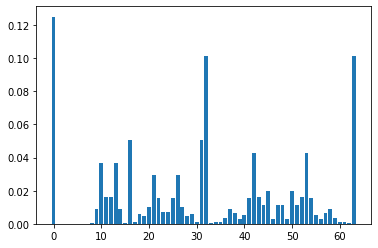

In [74]:
plt.bar(res_gb['phase_number'],res_gb[1])

In [ ]:
# 0.000000 - no way to get r

In [82]:
# 0.100000 = 1/2
(3**2)%5

4

In [86]:
# BUT also 0.100000 = 2/4
(3**4)%5
# and r = 4, so this state seems to be right, but 2^t is an integer multiple of r, so this is reason the algorithm fails here

1

In [83]:
# 0.111111 = 63/64. 64 is not an order of 3 modulo 5. Additionally, s/r = 63/64, but s < r < N=5
(3**64)%5

1

In [88]:
# 0.010000 = 1/4 - this is right. 
(3**4)%5

1

In [126]:
import math

t = 6 # amount of qubits in the first register
n = 2 # order up to which we want to get accurate result
eps = 0.0355 # probability of failure

In [127]:
t

6

In [128]:
n + math.log(2+1/(2*eps),2)

6.0075998158581605